<a href="https://colab.research.google.com/github/DiKachura/machine_learning/blob/main/%D0%B2%D0%B0%D1%85_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

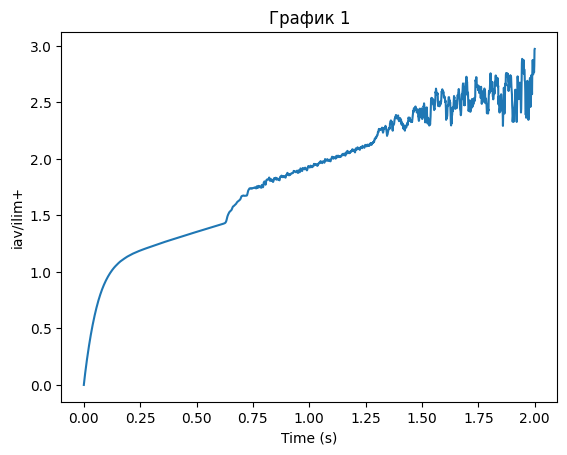

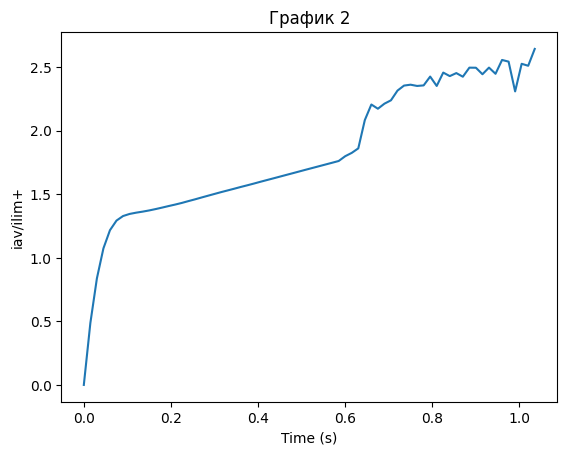

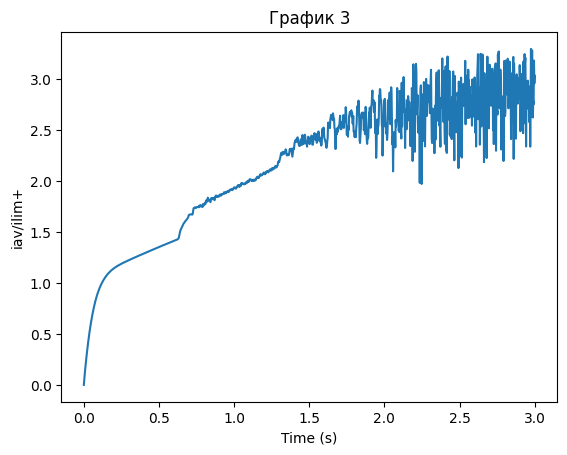

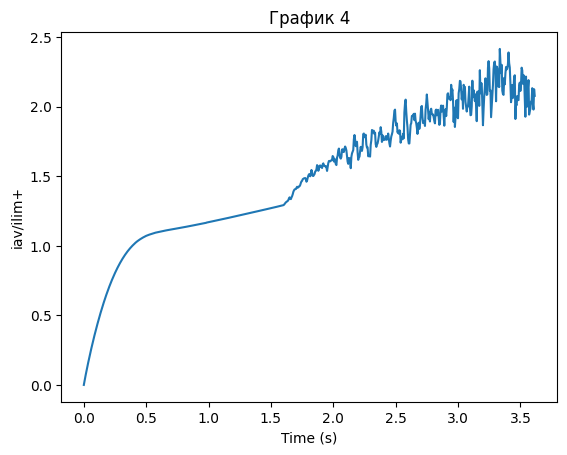

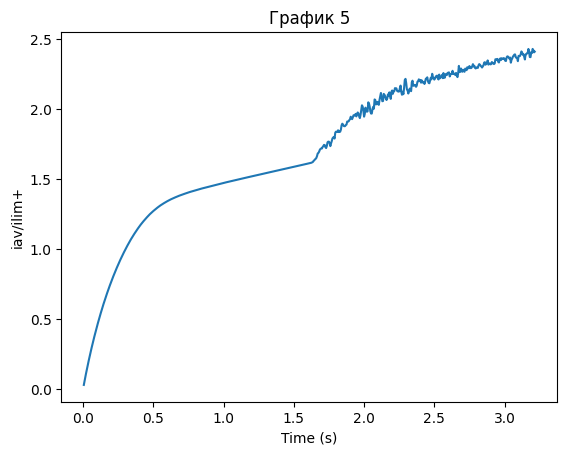

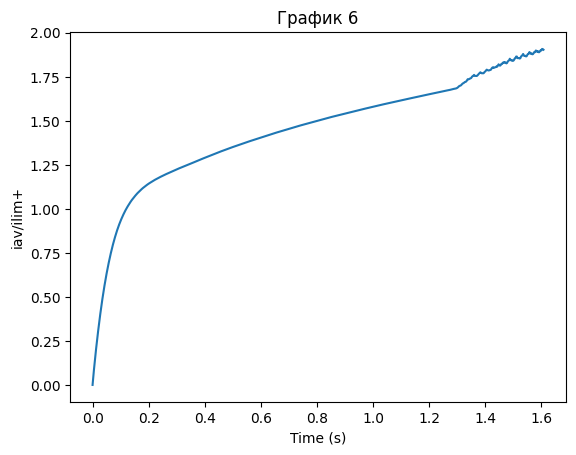

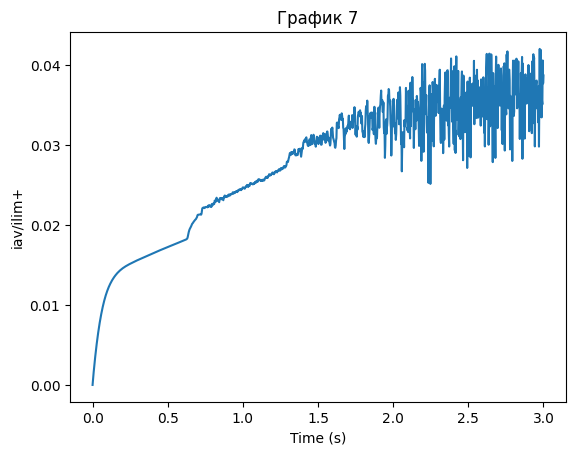

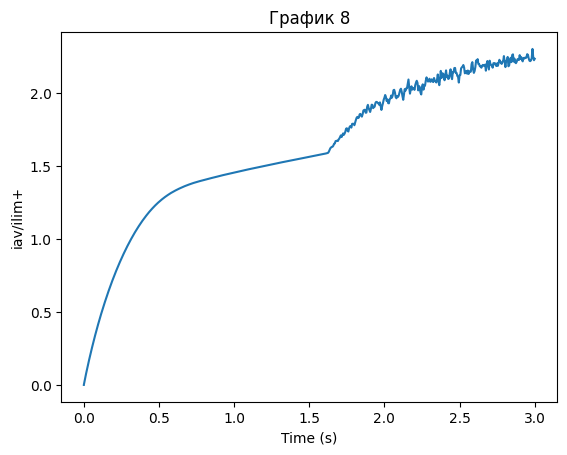

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Activation, Input, MaxPooling1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, Conv1D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.utils import plot_model
from IPython.display import display, Image


data = pd.read_excel('/content/диплом.xlsx')

# Группировка данных по номерам графиков
grouped_data = data.groupby('version')


for group_name, group_data in grouped_data:
    x = group_data['Time (s)']*0.005
    y = group_data['iav/ilim+']


    plt.figure()


    plt.plot(x, y)


    plt.title('График {}'.format(group_name))
    plt.xlabel('Time (s)')
    plt.ylabel('iav/ilim+')


    plt.show()

In [2]:
import pandas as pd

data = pd.read_excel('/content/диплом.xlsx')

data.head()

,Time (s),iav/ilim+,version,H,L,V0,C0,D1,D2,z1,...,j3a,j4k,D1_1,spacers_col,spacers_position,spacers_rad,sapcers_square,x,y,spacers_type
0,0.0,3.954700e-16,1,0.0005,0.004,0.0001,0.01,1.330000e-09,2.050000e-09,1,...,0,0,0.0,0,0,0.0,0.0,0,0,0
1,0.2,1.876400e-02,1,0.0005,0.004,0.0001,0.01,1.330000e-09,2.050000e-09,1,...,0,0,0.0,0,0,0.0,0.0,0,0,0
2,0.4,3.671700e-02,1,0.0005,0.004,0.0001,0.01,1.330000e-09,2.050000e-09,1,...,0,0,0.0,0,0,0.0,0.0,0,0,0
3,0.6,5.413000e-02,1,0.0005,0.004,0.0001,0.01,1.330000e-09,2.050000e-09,1,...,0,0,0.0,0,0,0.0,0.0,0,0,0
4,0.8,7.110900e-02,1,0.0005,0.004,0.0001,0.01,1.330000e-09,2.050000e-09,1,...,0,0,0.0,0,0,0.0,0.0,0,0,0


In [3]:
import pandas as pd

selected_row = data['iav/ilim+']

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()

print(sliced_data.head())

19    0.155028
20    0.170450
21    0.185590
22    0.200478
23    0.215136
Name: iav/ilim+, dtype: float64


In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_excel('/content/диплом.xlsx')

# Выбор одного ряда данных
selected_row = data['iav/ilim+']

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()


data_array = np.array(sliced_data)
data_x_list = []
data_y_list = []

for i in range(len(data_array) - window_size - 5):
    vekt_x = np.reshape(data_array[i:i+window_size], (window_size, 1))
    data_x_list.append(vekt_x)
    data_y_list.append(data_array[i+window_size:i+window_size+5])

data_x_array = np.stack(data_x_list)
data_y_array = np.stack(data_y_list)

# Создание модели
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, padding="same", strides=1, input_shape=(window_size, 1)))
model.add(Conv1D(8, 5))
model.add(Dropout(0.3))
model.add(Conv1D(16, 5))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation=None))

# Компиляция модели
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='mae')

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data_x_array) * 0.8)  # 80% данных для обучения
train_data_x = data_x_array[:train_size]
train_data_y = data_y_array[:train_size]
test_data_x = data_x_array[train_size:]
test_data_y = data_y_array[train_size:]


EPOCHS = 1000
model.fit(train_data_x, train_data_y, epochs=EPOCHS, batch_size=2)

# Оценка точности модели на тестовой выборке
test_loss = model.evaluate(test_data_x, test_data_y)
print("MAE на тестовой выборке:", test_loss)

Epoch 1/100
2817/2817 [==============================] - 49s 16ms/step - loss: 0.7477
Epoch 2/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4583
Epoch 3/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4512
Epoch 4/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4548
Epoch 5/100
2817/2817 [==============================] - 45s 16ms/step - loss: 0.4506
Epoch 6/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4578
Epoch 7/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4560
Epoch 8/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4471
Epoch 9/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4425
Epoch 10/100
2817/2817 [==============================] - 45s 16ms/step - loss: 0.4543
Epoch 11/100
2817/2817 [==============================] - 46s 16ms/step - loss: 0.4467
Epoch 12/100
2817/2817 [============================

In [ ]:
# Сохранение весов модели
model.save_weights('/content/model_weights1.h5')

# Сохранение архитектуры модели
with open('/content/model_architecture1.json', 'w') as f:
    f.write(model.to_json())

1/1 [==============================] - 0s 23ms/step


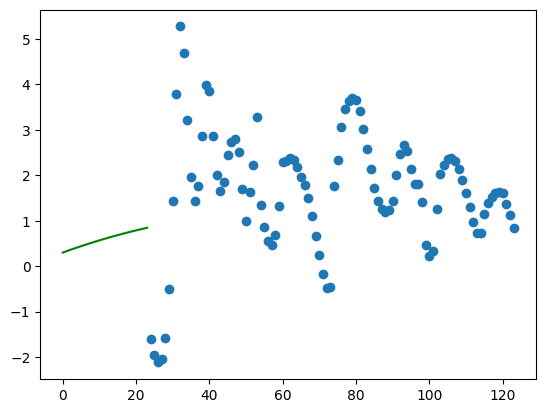

Предсказанные точки: [-1.5943241, -1.9472625, -2.1212316, -2.0433877, -1.5840924, -0.50139016, 1.425431, 3.7816331, 5.275979, 4.688017, 3.2090719, 1.9556978, 1.4260786, 1.7599103, 2.8745897, 3.9873369, 3.8452814, 2.865507, 2.0144498, 1.6535089, 1.8421819, 2.4394777, 2.727905, 2.8025653, 2.5050027, 1.6998746, 0.99910146, 1.6225259, 2.2205274, 3.2822254, 1.3557303, 0.8586739, 0.54956084, 0.46328714, 0.6868599, 1.3286812, 2.2910383, 2.321723, 2.376647, 2.339955, 2.1825492, 1.9607942, 1.7874224, 1.4978335, 1.0942266, 0.6568764, 0.2443538, -0.16922376, -0.47465798, -0.46926686, 1.7742319, 2.3384461, 3.0589092, 3.4699712, 3.6441405, 3.7105052, 3.6552966, 3.4123962, 3.021159, 2.5735438, 2.127898, 1.726712, 1.436548, 1.2491701, 1.1851804, 1.2439363, 1.444319, 2.009642, 2.4780443, 2.6672704, 2.531597, 2.1378343, 1.8042934, 1.8023326, 1.4179494, 0.46342543, 0.21835545, 0.32463816, 1.247391, 2.0295825, 2.2295957, 2.3521595, 2.390483, 2.3162231, 2.1436954, 1.9025962, 1.6128287, 1.2952888, 0.979615

In [69]:
data = pd.read_excel("/content/полная_тестовая_выборка.xlsx")

# Выбор одного ряда данных
selected_row = data['iav/ilim+']

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()


data_array = np.array(sliced_data)

# Предсказание значений
val_data = np.array(data_array[-window_size:])
predicted_data = []

for _ in range(100):
    val_data_reshaped = np.reshape(val_data, (1, window_size, 1))
    pred = model.predict(val_data_reshaped)
    predicted_data.append(pred[0][-1])
    val_data = np.concatenate((val_data[1:], np.expand_dims(pred[0][-1], axis=0)))


plt.plot(data_array, 'g', np.arange(len(data_array), len(data_array) + len(predicted_data)), predicted_data, 'o')
plt.show()

print("Предсказанные точки:", predicted_data)

нейронка над которой идет работа

In [281]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [282]:
# define input sequence
raw_seq = pd.read_excel('/content/первая_выборка.xlsx')['iav/ilim+']
# choose a number of time steps
n_steps_in, n_steps_out = 42, 41
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [283]:
X

array([[3.9547e-16, 1.8764e-02, 3.6717e-02, ..., 5.2922e-01, 5.3927e-01,
        5.4917e-01],
       [1.8764e-02, 3.6717e-02, 5.4130e-02, ..., 5.3927e-01, 5.4917e-01,
        5.5891e-01],
       [3.6717e-02, 5.4130e-02, 7.1109e-02, ..., 5.4917e-01, 5.5891e-01,
        5.6848e-01],
       ...,
       [2.5914e+00, 2.5853e+00, 2.4453e+00, ..., 2.7648e+00, 2.6911e+00,
        2.6834e+00],
       [2.5853e+00, 2.4453e+00, 2.3540e+00, ..., 2.6911e+00, 2.6834e+00,
        2.5970e+00],
       [2.4453e+00, 2.3540e+00, 2.3267e+00, ..., 2.6834e+00, 2.5970e+00,
        2.3973e+00]])

In [284]:
y

array([[0.55891, 0.56848, 0.57792, ..., 0.83973, 0.84507, 0.85032],
       [0.56848, 0.57792, 0.58732, ..., 0.84507, 0.85032, 0.85548],
       [0.57792, 0.58732, 0.59659, ..., 0.85032, 0.85548, 0.86056],
       ...,
       [2.597  , 2.3973 , 2.3915 , ..., 2.8034 , 2.7661 , 2.8244 ],
       [2.3973 , 2.3915 , 2.3974 , ..., 2.7661 , 2.8244 , 2.9637 ],
       [2.3915 , 2.3974 , 2.3637 , ..., 2.8244 , 2.9637 , 2.9727 ]])

In [285]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [286]:
X

array([[[3.9547e-16],
        [1.8764e-02],
        [3.6717e-02],
        ...,
        [5.2922e-01],
        [5.3927e-01],
        [5.4917e-01]],

       [[1.8764e-02],
        [3.6717e-02],
        [5.4130e-02],
        ...,
        [5.3927e-01],
        [5.4917e-01],
        [5.5891e-01]],

       [[3.6717e-02],
        [5.4130e-02],
        [7.1109e-02],
        ...,
        [5.4917e-01],
        [5.5891e-01],
        [5.6848e-01]],

       ...,

       [[2.5914e+00],
        [2.5853e+00],
        [2.4453e+00],
        ...,
        [2.7648e+00],
        [2.6911e+00],
        [2.6834e+00]],

       [[2.5853e+00],
        [2.4453e+00],
        [2.3540e+00],
        ...,
        [2.6911e+00],
        [2.6834e+00],
        [2.5970e+00]],

       [[2.4453e+00],
        [2.3540e+00],
        [2.3267e+00],
        ...,
        [2.6834e+00],
        [2.5970e+00],
        [2.3973e+00]]])

In [287]:
from keras.layers import Dropout
from keras.regularizers import l2

# Определение модели
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.5))  # Увеличение коэффициента dropout
model.add(LSTM(100, activation='relu', kernel_regularizer=l2(0.01)))  # Добавление L2-регуляризации
model.add(Dropout(0.5))  # Увеличение коэффициента dropout
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [288]:
# fit model
model.fit(X, y, epochs=100, verbose=0)

In [289]:
# demonstrate prediction
x_input = array(pd.read_excel('/content/тестовая_выборка.xlsx')['iav/ilim+'])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1.0140996 1.0150304 1.0198922 1.0207419 1.024897  1.0245018 1.025331
  1.0309944 1.0301237 1.0331575 1.0359508 1.0354764 1.0393063 1.0416385
  1.0395113 1.042838  1.0435107 1.0471263 1.0474917 1.0482718 1.0508482
  1.0514892 1.0519322 1.0555044 1.0588543 1.0598097 1.060443  1.0620306
  1.0631412 1.0655761 1.0671537 1.0689236 1.0674214 1.0693227 1.0708182
  1.0737854 1.07328   1.0759254 1.0749124 1.0788407 1.0804858]]


In [290]:
# calculate error
mse = ((y[0] - yhat[0])**2).mean()
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11368740081138717


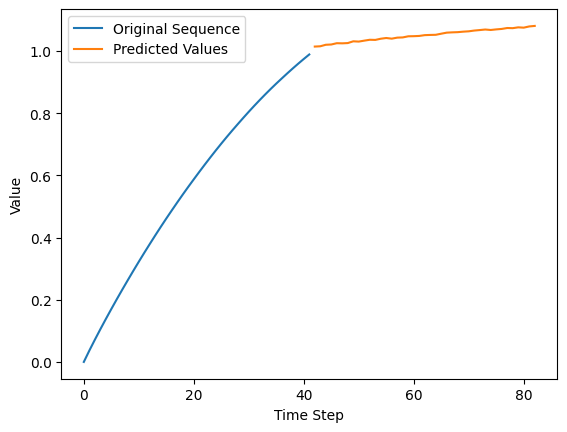

In [291]:
import matplotlib.pyplot as plt

# demonstrate prediction
x_input = array(pd.read_excel('/content/тестовая_выборка.xlsx')['iav/ilim+'])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

new_data = pd.read_excel('/content/тестовая_выборка.xlsx')['iav/ilim+']
# Plot the original sequence and the predicted values
plt.plot(new_data, label='Original Sequence')
plt.plot(range(n_steps_in, n_steps_in + n_steps_out), yhat[0], label='Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

In [292]:
# Сохранение весов модели
model.save_weights('/content/model_weights_lstm100.h5')

# Сохранение архитектуры модели
with open('/content/model_architecture_lstm100.json', 'w') as f:
    f.write(model.to_json())